In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [10]:
df[["Region"]] = df[["Region"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [11]:
df["Classes"].unique()

array(['not fire', 'fire', nan, 'Classes'], dtype=object)

In [12]:
df.shape
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [13]:
df = df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [14]:
df.shape
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df.drop(["day", "month", "year"], axis=1, inplace=True)

In [18]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [19]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df.iloc[[122]]
df = df.drop(122).reset_index(drop=True)

In [21]:
df.iloc[[122]]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [22]:
df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]] = df[
    ["Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]
].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    object 
 1   RH           243 non-null    object 
 2   Ws           243 non-null    object 
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 22.9+ KB


In [23]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [24]:
df[["Temperature", "RH", "Ws"]] = df[["Temperature", "RH", "Ws"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [90]:
df["Classes"].value_counts()

Classes
1          137
0          106
Name: count, dtype: int64

In [26]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

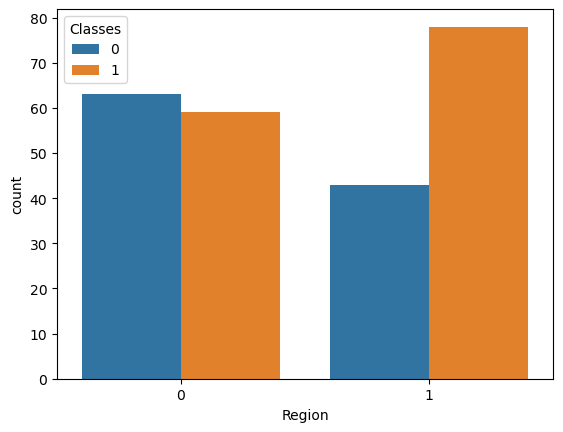

In [27]:
sns.countplot(x="Region", hue="Classes", data=df)

In [28]:
df.to_csv("Algerian_Cleaned_Dataset.csv", index=False)

In [29]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# Model Training

In [55]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [56]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [57]:
X = df.drop("FWI", axis=1)  # Independent Features
y = df["FWI"]  # Dependent Features

In [58]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

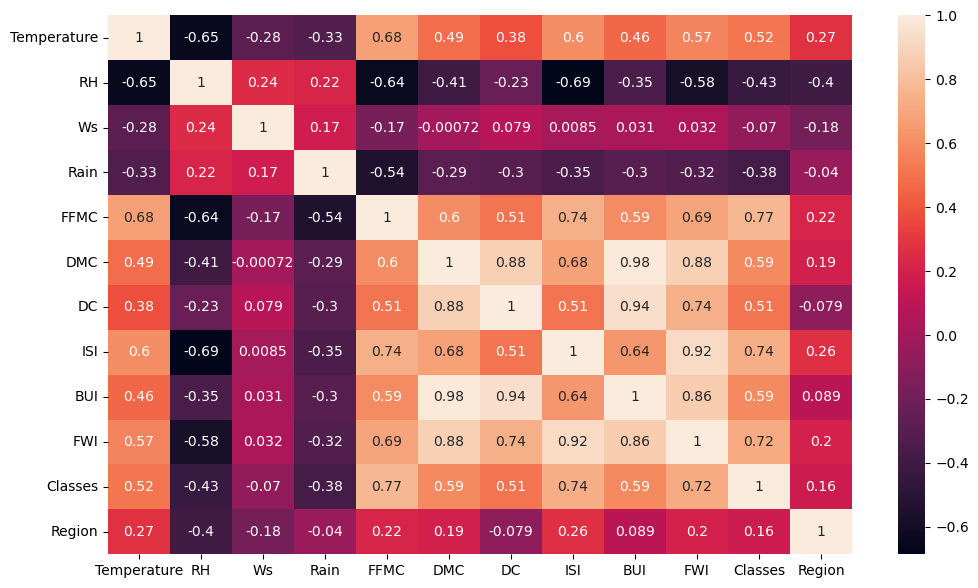

In [59]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [61]:
def high_corr(dataset, threshold):
    corr_cols = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col = corr_matrix.columns[i]
                corr_cols.add(col)
    return corr_cols


corr_features = high_corr(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [62]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train_new, y_train)
y_pred = lin_reg.predict(X_test_new)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mse: ", mse)
print("R2_score: ", score)

Mse:  0.67427668737916
R2_score:  0.9847657384266951


# Assumptions

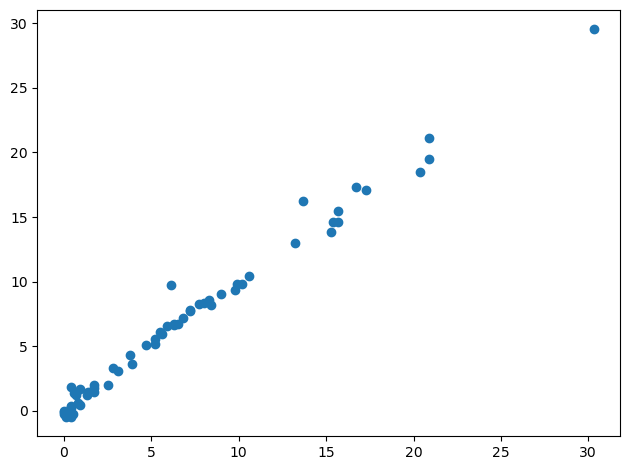

In [83]:
plt.scatter(y_test, y_pred)
plt.tight_layout()

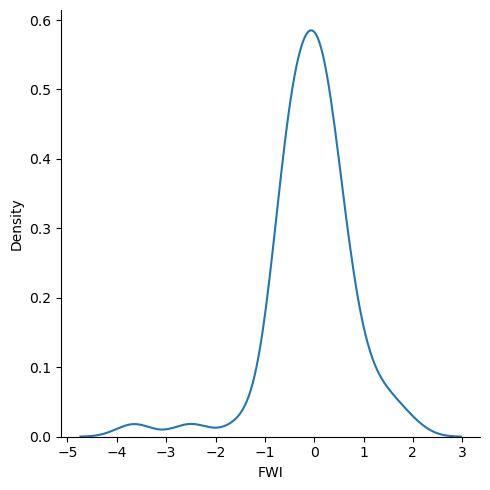

In [84]:
residuals = y_test - y_pred
sns.displot(residuals, kind="kde")
plt.tight_layout()

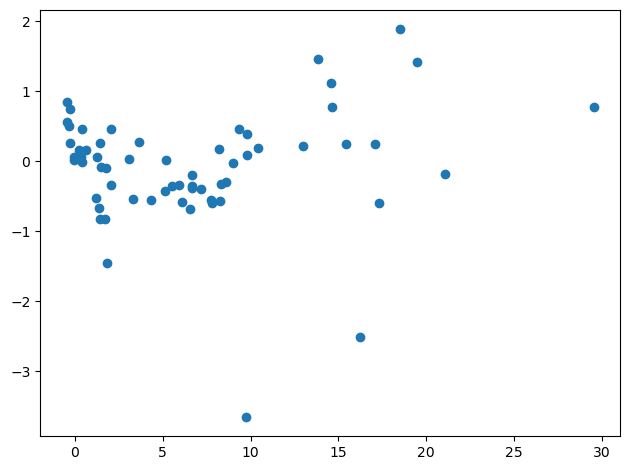

In [85]:
plt.scatter(y_pred, residuals)
plt.tight_layout()

# Linear Regression Model Pickling

In [ ]:
import pickle

pickle.dump(lin_reg, open("linear_reg_forest_fire.pkl", "wb"))

In [ ]:
linear_reg_model = pickle.load(open("linear_reg_forest_fire.pkl", "rb"))
linear_reg_model.predict(X_test_new)

array([ 8.31996412e+00,  7.45235640e+00, -8.27841406e-02,  5.16297204e+00,
        6.54064195e+00,  1.44543845e+00,  2.26547638e+00,  7.46300597e+00,
        1.92399106e+00,  3.18524625e+00,  7.39775428e-02,  5.94281376e+00,
        9.48344115e+00,  1.63845627e+01,  1.91363707e+01,  1.31652130e+00,
        2.08631652e+00, -2.96788725e-03,  6.76169290e+00,  3.14670707e+00,
        1.27353235e+00,  1.86197099e-01,  6.42186652e+00,  9.35012627e-02,
        2.10746623e+01,  5.00923944e+00,  5.87895763e+00,  9.98883439e+00,
        1.27612791e-01,  9.65513073e+00,  6.35241685e+00, -1.60871489e-01,
        1.02650479e+01,  1.50897365e+01,  1.29812593e+00,  6.24859348e-01,
        1.82949587e+00,  6.12102707e+00, -2.80701367e-01, -4.94849429e-01,
        7.03055056e+00,  1.57271366e+00,  8.45730189e+00, -3.51626222e-01,
        1.51365466e+01,  7.87828752e+00,  7.72962790e+00,  1.07804026e+00,
        1.24569975e+01,  8.41526407e-01,  2.85899477e+01,  5.43283120e+00,
        1.71859071e+01,  

# RidgeCV

Mae:  0.5642305340105699
R2_Score:  0.9842993364555513


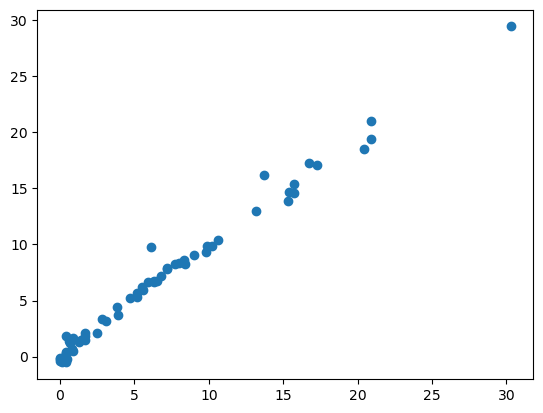

In [70]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=3)
ridgecv.fit(X_train_new, y_train)
y_pred_ridgecv = ridgecv.predict(X_test_new)

from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_ridgecv)
score = r2_score(y_test, y_pred_ridgecv)
print("Mae: ", mae)
print("R2_Score: ", score)
plt.scatter(y_test, y_pred_ridgecv)

# LassoCV

Mae:  0.6199701158263431
R2_Score:  0.9820946715928275


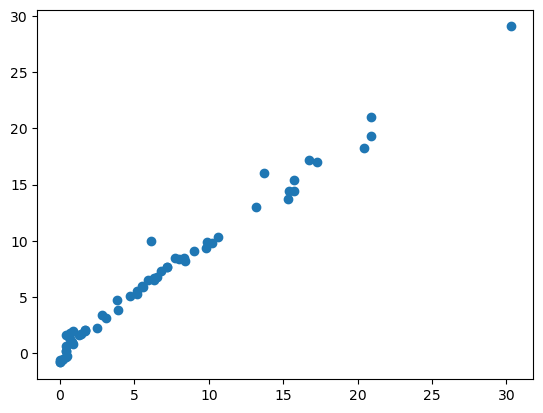

In [71]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=3)
lassocv.fit(X_train_new, y_train)
y_pred_lassocv = lassocv.predict(X_test_new)

from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_lassocv)
score = r2_score(y_test, y_pred_lassocv)
print("Mae: ", mae)
print("R2_Score: ", score)
plt.scatter(y_test, y_pred_lassocv)

#  ElasticNetCV

Mae:  0.6666441078172392
R2_Score:  0.981103560778099


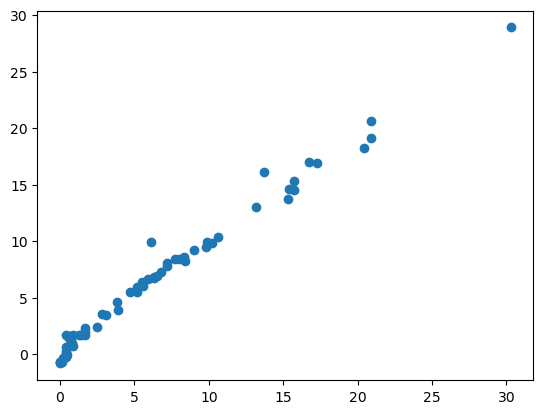

In [72]:
from sklearn.linear_model import ElasticNetCV

elastic_netcv = ElasticNetCV(cv=3)
elastic_netcv.fit(X_train_new, y_train)
y_pred_elastic_netcv = elastic_netcv.predict(X_test_new)

from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_elastic_netcv)
score = r2_score(y_test, y_pred_elastic_netcv)
print("Mae: ", mae)
print("R2_Score: ", score)
plt.scatter(y_test, y_pred_elastic_netcv)

##  Machine Learning Model Pickling,     
## Preprocessing Model StandardScaler

#### Best Ml Model -> RidgeCV
#### scaler -> StandardScaler

In [88]:
import pickle

In [89]:
pickle.dump(ridgecv, open("RidgeCV_fire.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))